## <center>DOES FOREIGN AID PROMOTE ECONOMIC GROWTH?<center>
    

In [1]:
##importing all the dictionries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
import statsmodels.api as sm

import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [2]:
data = pd.read_excel("workingData_big.xlsx", sheet_name="Low income",  na_values=["."])

In [3]:
data.head()

,Country Name,Country Code,Time,Time Code,ln_initial2000_gdp,GDP (constant 2010 US$),GDP growth (annual %),GDP per capita (constant 2010 US$),GDP per capita growth (annual %),Gross savings (% of GDP),...,"Population, total [SP.POP.TOTL]",Population growth (annual %),"FDI, net inflows (% of GDP)",Consumer price index (2010 = 100) [FP.CPI.TOTL],Aid/Gdp,Aid/Gdp_sqr,ln_ODA,ln_gdp,ln_gdp_pc,wopen
0,Bangladesh,BGD,1990,YR1990,24.928159,4.242066e+10,5.622258,399.483941,3.046659,23.024412,...,106188642.0,2.468724,0.010250,32.249220,6.893835,47.524957,21.796359,24.470901,5.990174,2.652706
1,Bangladesh,BGD,1991,YR1991,24.928159,4.389911e+10,3.485228,403.753799,1.068843,22.560406,...,108727432.0,2.362697,0.004491,34.299420,5.862168,34.365019,21.668509,24.505160,6.000805,3.394641
2,Bangladesh,BGD,1992,YR1992,24.928159,4.628840e+10,5.442686,416.180524,3.077798,21.994004,...,111221938.0,2.268352,0.011738,35.545888,5.087710,25.884798,21.579815,24.558157,6.031119,4.187243
3,Bangladesh,BGD,1993,YR1993,24.928159,4.846931e+10,4.711562,426.309441,2.433780,20.901202,...,113695139.0,2.199300,0.042362,36.617532,3.745875,14.031582,21.319682,24.604197,6.055165,4.545189
4,Bangladesh,BGD,1994,YR1994,24.928159,5.035483e+10,3.890126,433.412344,1.666138,22.417160,...,116182267.0,2.163958,0.033012,38.563292,4.368836,19.086730,21.511687,24.642360,6.071690,4.702223


In [4]:
data.shape

(644, 27)

In [5]:
data.columns

Index(['Country Name', 'Country Code', 'Time', 'Time Code',
       'ln_initial2000_gdp', 'GDP (constant 2010 US$)',
       'GDP growth (annual %)', 'GDP per capita (constant 2010 US$)',
       'GDP per capita growth (annual %)', 'Gross savings (% of GDP)',
       'Gross fixed capital formation (% of GDP) [NE.GDI.FTOT.ZS]',
       'Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]',
       'Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]',
       'Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]',
       'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
       'Trade (% of GDP) [NE.TRD.GNFS.ZS]',
       'Net official development assistance (constant 2015 US$)',
       'Population, total [SP.POP.TOTL]', 'Population growth (annual %)',
       'FDI, net inflows (% of GDP)',
       'Consumer price index (2010 = 100) [FP.CPI.TOTL]', 'Aid/Gdp',
       'Aid/Gdp_sqr', 'ln_ODA', 'ln_gdp', 'ln_gdp_pc', 'wopen'],
      dtype='object')

<H2><center>DATA CLEANING</center></H2>

In [6]:
#removing columns that are not required
data_1=data.drop(columns=['Country Code','Time Code','GDP growth (annual %)',
                          'Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]'
                         ,'Consumer price index (2010 = 100) [FP.CPI.TOTL]',
                          'ln_initial2000_gdp','GDP per capita growth (annual %)','ln_gdp'
                         ,'Gross savings (% of GDP)'], axis=1)
##renaming columns 
data_new = data_1.rename(columns = {'Country Name':'Country','Trade (% of GDP) [NE.TRD.GNFS.ZS]':'Trade',
             'Population, total [SP.POP.TOTL]':'Total_Population',
             'Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]':'Imports',
                                   'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]':'Exports',
                                   'Trade (% of GDP) [NE.TRD.GNFS.ZS]':'Trade'
                                   ,'Net official development assistance (constant 2015 US$)':'ODA'
                        ,'Gross fixed capital formation (% of GDP) [NE.GDI.FTOT.ZS]':'Gross fixed capital formation (% of GDP)'
                                   ,'Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]':'Gross domestic savings (% of GDP)'
                                   })

In [7]:
# replace missing values with means of their respective countries
data_new['Trade'] = data_new['Trade'].fillna(data_new.groupby('Country')['Trade'].transform('mean'))
data_new['Trade'] = data_new['Trade'].fillna(data_new['Trade'].mean())

data_new['GDP (constant 2010 US$)'] = data_new['GDP (constant 2010 US$)'].fillna(data_new.groupby('Country')['GDP (constant 2010 US$)'].transform('mean'))
data_new['GDP (constant 2010 US$)'] = data_new['GDP (constant 2010 US$)'].fillna(data_new['GDP (constant 2010 US$)'].mean())

data_new['GDP per capita (constant 2010 US$)'] = data_new['GDP per capita (constant 2010 US$)'].fillna(data_new.groupby('Country')['GDP per capita (constant 2010 US$)'].transform('mean'))
data_new['GDP per capita (constant 2010 US$)'] = data_new['GDP per capita (constant 2010 US$)'].fillna(data_new['GDP per capita (constant 2010 US$)'].mean())

data_new['Exports'] = data_new['Exports'].fillna(data_new.groupby('Country')['Exports'].transform('mean'))
data_new['Exports'] = data_new['Exports'].fillna(data_new['Exports'].mean())

data_new['Imports'] = data_new['Imports'].fillna(data_new.groupby('Country')['Imports'].transform('mean'))
data_new['Imports'] = data_new['Imports'].fillna(data_new['Imports'].mean())

data_new['Aid/Gdp'] = data_new['Aid/Gdp'].fillna(data_new.groupby('Country')['Aid/Gdp'].transform('mean'))
data_new['Aid/Gdp'] = data_new['Aid/Gdp'].fillna(data_new['Aid/Gdp'].mean())

data_new['Aid/Gdp_sqr'] = data_new['Aid/Gdp_sqr'].fillna(data_new.groupby('Country')['Aid/Gdp_sqr'].transform('mean'))
data_new['Aid/Gdp_sqr'] = data_new['Aid/Gdp_sqr'].fillna(data_new['Aid/Gdp_sqr'].mean())

data_new['ln_ODA'] = data_new['ln_ODA'].fillna(data_new.groupby('Country')['ln_ODA'].transform('mean'))
data_new['ln_ODA'] = data_new['ln_ODA'].fillna(data_new['ln_ODA'].mean())

data_new['ODA'] = data_new['ODA'].fillna(data_new.groupby('Country')['ODA'].transform('mean'))
data_new['ODA'] = data_new['ODA'].fillna(data_new['ODA'].mean())

data_new['wopen'] = data_new['wopen'].fillna(data_new.groupby('Country')['wopen'].transform('mean'))
data_new['wopen'] = data_new['wopen'].fillna(data_new['wopen'].mean())

data_new['Gross fixed capital formation (% of GDP)'] = data_new['Gross fixed capital formation (% of GDP)'].fillna(data_new.groupby('Country')['Gross fixed capital formation (% of GDP)'].transform('mean'))
data_new['Gross fixed capital formation (% of GDP)'] = data_new['Gross fixed capital formation (% of GDP)'].fillna(data_new['Gross fixed capital formation (% of GDP)'].mean())

data_new['Gross domestic savings (% of GDP)'] = data_new['Gross domestic savings (% of GDP)'].fillna(data_new.groupby('Country')['Gross domestic savings (% of GDP)'].transform('mean'))
data_new['Gross domestic savings (% of GDP)'] = data_new['Gross domestic savings (% of GDP)'].fillna(data_new['Gross domestic savings (% of GDP)'].mean())

data_new['FDI, net inflows (% of GDP)'] = data_new['FDI, net inflows (% of GDP)'].fillna(data_new.groupby('Country')['ODA'].transform('mean'))
data_new['FDI, net inflows (% of GDP)'] = data_new['FDI, net inflows (% of GDP)'].fillna(data_new['FDI, net inflows (% of GDP)'].mean())

In [8]:
#descriptive stats
data_new.describe()

,Time,GDP (constant 2010 US$),GDP per capita (constant 2010 US$),Gross fixed capital formation (% of GDP),Gross domestic savings (% of GDP),Imports,Exports,Trade,ODA,Total_Population,Population growth (annual %),"FDI, net inflows (% of GDP)",Aid/Gdp,Aid/Gdp_sqr,ln_ODA,ln_gdp_pc,wopen
count,644.000000,6.440000e+02,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,6.440000e+02,6.440000e+02,644.000000,6.440000e+02,6.440000e+02,6.440000e+02,644.000000,644.000000,644.000000
mean,2003.500000,2.263967e+10,817.347300,18.262909,12.755536,29.866617,30.311150,54.069414,7.092432e+08,2.089264e+08,2.554517,5.383340e+06,6.290137e+00,8.544590e+01,16.047974,6.505553,8.884172
std,8.084026,3.846919e+10,569.172263,8.259588,12.402386,18.134253,18.574272,30.903554,8.594486e+08,4.043168e+08,0.711251,5.422398e+07,6.778748e+00,1.691776e+02,7.069927,0.619309,21.323731
min,1990.000000,4.724591e+08,161.833816,0.000000,-13.780052,-42.593931,4.685804,8.174071,3.324395e+01,9.168080e+05,0.205493,-4.844261e+00,2.556252e-07,6.534425e-14,3.503873,5.086570,-0.082960
25%,1996.750000,3.216717e+09,426.275401,12.350478,5.364295,20.043357,17.004159,34.337343,1.179871e+02,9.749322e+06,2.197636,8.254370e-01,3.598209e-06,1.294714e-11,4.770573,6.055086,2.549153
50%,2003.500000,9.640964e+09,583.588145,18.262909,10.757119,30.706781,25.277662,47.919828,4.516650e+08,2.826498e+07,2.681981,2.280254e+00,4.590018e+00,2.106849e+01,19.928441,6.369195,4.752489
75%,2010.250000,1.814163e+10,1045.029937,22.730680,17.272821,37.721848,38.382794,63.112567,1.124140e+09,1.784961e+08,3.029991,3.113788e+00,1.005293e+01,1.010615e+02,20.840277,6.951801,7.843469
max,2017.000000,2.408567e+11,2925.527748,52.938841,103.632294,98.791145,101.593436,200.384580,6.543840e+09,3.111140e+09,3.968382,6.382439e+08,4.502036e+01,2.026833e+03,22.601790,7.981230,337.822360


In [9]:
data_new.isnull().sum()

Country                                     0
Time                                        0
GDP (constant 2010 US$)                     0
GDP per capita (constant 2010 US$)          0
Gross fixed capital formation (% of GDP)    0
Gross domestic savings (% of GDP)           0
Imports                                     0
Exports                                     0
Trade                                       0
ODA                                         0
Total_Population                            0
Population growth (annual %)                0
FDI, net inflows (% of GDP)                 0
Aid/Gdp                                     0
Aid/Gdp_sqr                                 0
ln_ODA                                      0
ln_gdp_pc                                   0
wopen                                       0
dtype: int64

In [13]:
data_new.to_csv('final_world.csv')

<H2><CENTER>DESCRIPTIVE ANALYSIS<CENTER></H2>

'medium'

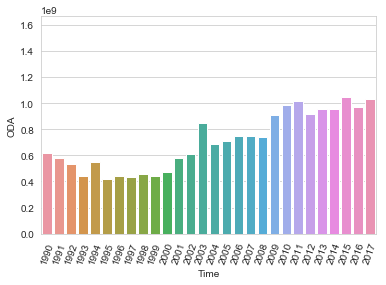

In [10]:
## AID over the years 1990-2017(Bar Chart)
sns.set_style('whitegrid')
ODA_1990_2017 = sns.barplot(x='Time', y='ODA', data=data_new, errwidth=0, capsize=10)
plt.xticks(rotation=70)
plt.rcParams["xtick.labelsize"]

'medium'

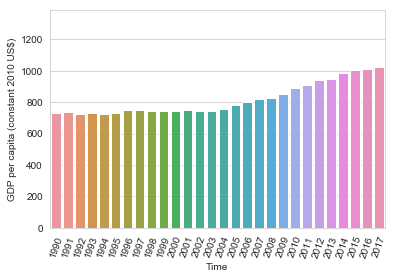

In [11]:
## AID over the years 1990-2017(Bar Chart)
sns.set_style('whitegrid')
ODA_1990_2017 = sns.barplot(x='Time', y='GDP per capita (constant 2010 US$)', data=data_new, errwidth=0, capsize=10)
plt.xticks(rotation=70)
plt.rcParams["xtick.labelsize"]

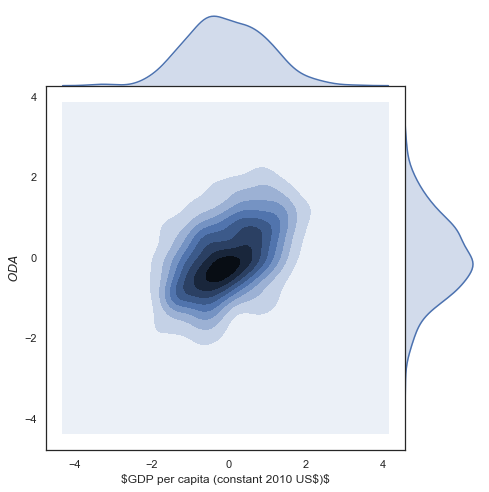

In [12]:
## GDP per capita vs ODA(Joint Map)
sns.set(style="white")
# Generate a random correlated bivariate dataset
rs = np.random.RandomState(5)
mean = [0, 0]
cov = [(1, .5), (.5, 1)]
GDPpc, ODA = rs.multivariate_normal(mean, cov, 500).T
GDPpc = pd.Series(GDPpc, name="$GDP per capita (constant 2010 US$)$")
ODA = pd.Series(ODA, name="$ODA$")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(GDPpc, ODA, kind="kde", height=7, space=0)

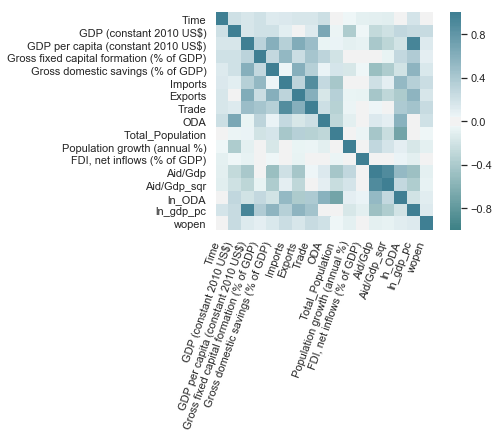

In [13]:
corr = data_new.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(200, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=70,
    horizontalalignment='right'
);

In [14]:
#correlation matrix
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data_new.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,GDP (constant 2010 US$),GDP per capita (constant 2010 US$),Gross fixed capital formation (% of GDP),Gross domestic savings (% of GDP),Imports,Exports,Trade,ODA,Total_Population,Population growth (annual %),"FDI, net inflows (% of GDP)",Aid/Gdp,Aid/Gdp_sqr,ln_ODA,ln_gdp_pc,wopen
Time,1,0.218282,0.160326,0.202169,0.131749,0.144471,0.171461,0.163309,0.221493,0.0308813,-0.0446764,-0.096522,-0.105493,-0.110932,0.0261635,0.182236,0.0134708
GDP (constant 2010 US$),0.218282,1,0.159558,0.195779,0.195726,0.104927,-0.013549,0.11995,0.664141,-0.0523797,-0.384713,-0.0423338,-0.274543,-0.216489,0.281608,0.255641,0.250559
GDP per capita (constant 2010 US$),0.160326,0.159558,1,0.319475,0.607825,0.344398,0.628108,0.489639,-0.0627444,0.0488739,-0.0997299,-0.0795902,-0.419779,-0.305649,-0.202757,0.940638,0.119674
Gross fixed capital formation (% of GDP),0.202169,0.195779,0.319475,1,0.265916,0.532024,0.234611,0.43328,0.310924,-0.198972,0.00661685,-0.0166541,-0.0357438,-0.0703157,0.277658,0.369754,0.0922224
Gross domestic savings (% of GDP),0.131749,0.195726,0.607825,0.265916,1,0.0395686,0.606932,0.339678,0.0593811,0.174629,-0.16292,-0.0420026,-0.488846,-0.379304,-0.192596,0.568761,0.149848
Imports,0.144471,0.104927,0.344398,0.532024,0.0395686,1,0.298427,0.882179,0.25923,-0.429552,0.00718115,-0.0119273,0.211185,0.0994932,0.515709,0.344554,0.228574
Exports,0.171461,-0.013549,0.628108,0.234611,0.606932,0.298427,1,0.597239,-0.156688,0.341097,-0.0644538,-0.0715487,-0.437448,-0.294916,-0.390884,0.561654,0.165935
Trade,0.163309,0.11995,0.489639,0.43328,0.339678,0.882179,0.597239,1,0.221309,-0.33583,-0.0533228,-0.0303486,0.0446964,-0.0188875,0.395103,0.44061,0.252584
ODA,0.221493,0.664141,-0.0627444,0.310924,0.0593811,0.25923,-0.156688,0.221309,1,-0.296799,-0.101757,-0.0332371,0.140266,0.0941177,0.584838,0.010272,0.201438
Total_Population,0.0308813,-0.0523797,0.0488739,-0.198972,0.174629,-0.429552,0.341097,-0.33583,-0.296799,1,0.0220191,-0.0472853,-0.436243,-0.243978,-0.705144,0.0261746,-0.0466861


In [15]:
##Making bins for diffrent time periods
group_1 = data_new['Time'].between(1990,2000,inclusive=True)
group_2 = data_new['Time'].between(2000,2010,inclusive=True)
group_3 = data_new['Time'].between(2010,2017,inclusive=True)
group_4 = data_new['Time'].between(2000,2017,inclusive=True)
group_5 = data_new['Time'].between(1990,2017,inclusive=True)

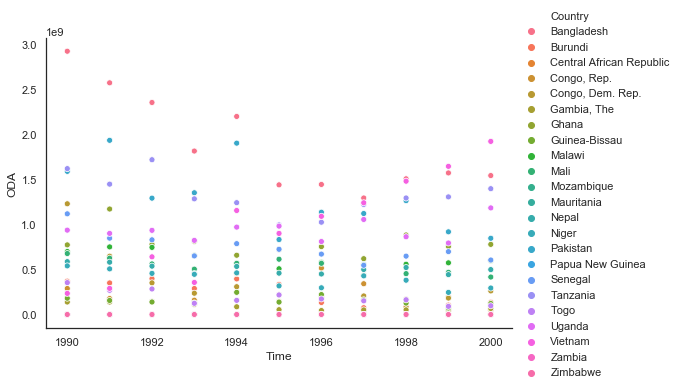

In [16]:
pre_ODA = sns.relplot(x='Time', y='ODA', hue="Country", data=data_new[group_1], height=5, aspect=1.5)

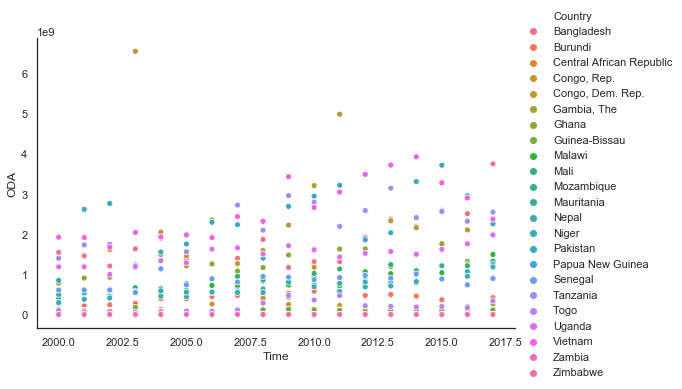

In [17]:
post_ODA = sns.relplot(x='Time', y='ODA', hue="Country", data=data_new[group_4], height=5, aspect=1.5)
post_ODA = ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

<h1><center>Linear Regression</center></h1>

In [18]:
data_new[group_5].head()

,Country,Time,GDP (constant 2010 US$),GDP per capita (constant 2010 US$),Gross fixed capital formation (% of GDP),Gross domestic savings (% of GDP),Imports,Exports,Trade,ODA,Total_Population,Population growth (annual %),"FDI, net inflows (% of GDP)",Aid/Gdp,Aid/Gdp_sqr,ln_ODA,ln_gdp_pc,wopen
0,Bangladesh,1990,4.242066e+10,399.483941,16.458676,15.906289,13.058186,5.908316,18.966502,2.924410e+09,106188642.0,2.468724,0.010250,6.893835,47.524957,21.796359,5.990174,2.652706
1,Bangladesh,1991,4.389911e+10,403.753799,16.895947,14.573179,12.227215,6.662612,18.889827,2.573440e+09,108727432.0,2.362697,0.004491,5.862168,34.365019,21.668509,6.000805,3.394641
2,Bangladesh,1992,4.628840e+10,416.180524,17.305029,13.864411,12.347329,7.586677,19.934006,2.355020e+09,111221938.0,2.268352,0.011738,5.087710,25.884798,21.579815,6.031119,4.187243
3,Bangladesh,1993,4.846931e+10,426.309441,17.946832,12.299284,14.104314,9.017269,23.121583,1.815600e+09,113695139.0,2.199300,0.042362,3.745875,14.031582,21.319682,6.055165,4.545189
4,Bangladesh,1994,5.035483e+10,433.412344,18.402556,13.103851,13.864321,9.001544,22.865865,2.199920e+09,116182267.0,2.163958,0.033012,4.368836,19.086730,21.511687,6.071690,4.702223


In [19]:
# Creating a dataset for regression analysis
entity = data_new[group_5]['Country'].unique()
time = list(pd.date_range('1-1-1990',freq='A', periods=28))
index = pd.MultiIndex.from_product([entity, time])
allvars = ['Gross fixed capital formation (% of GDP)','Gross domestic savings (% of GDP)',
           'Population growth (annual %)','FDI, net inflows (% of GDP)',
            'Aid/Gdp_sqr','Aid/Gdp', 'ln_ODA',
       'ln_gdp_pc', 'wopen','Trade']

df = pd.DataFrame(np.array(data_new[group_5][allvars]),
                  index=index, columns = allvars)

In [20]:
from linearmodels.panel import PanelOLS
# fixed effects
# documentation: https://bashtage.github.io/linearmodels/panel/models.html#linearmodels.panel.model.PanelOLS

independent_vars = ['Gross fixed capital formation (% of GDP)','Gross domestic savings (% of GDP)',
          'Population growth (annual %)','FDI, net inflows (% of GDP)',
            'Aid/Gdp_sqr','Aid/Gdp', 'ln_ODA','wopen','Trade']

mod = PanelOLS(df['ln_gdp_pc'], 
               df[independent_vars], 
               entity_effects=True, time_effects=True) # you can turn on or off both entity_effects and time_effects

res = mod.fit(cov_type='clustered', cluster_entity=True) # here cov_type means covariance estimators type.
# cov_type can be ‘unadjusted’, ‘homoskedastic’ or ‘robust’, ‘heteroskedastic’ or ‘clustered` - One or two way clustering.

print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              ln_gdp_pc   R-squared:                        0.3257
Estimator:                   PanelOLS   R-squared (Between):              0.7419
No. Observations:                 644   R-squared (Within):               0.5023
Date:                Thu, Nov 21 2019   R-squared (Overall):              0.7417
Time:                        01:16:57   Log-likelihood                    365.20
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      31.401
Entities:                          23   P-value                           0.0000
Avg Obs:                       28.000   Distribution:                   F(9,585)
Min Obs:                       28.000                                           
Max Obs:                       28.000   F-statistic (robust):             8.8939
                            

<h2><center>DIAGNOSTIC ANALYSIS</center></h2>

<h3> 1. Unit root test </h3>

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

H0: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    
H1: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [21]:
##Unit root test on our dependent variable
X=df['ln_gdp_pc'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.635003
p-value: 0.005126
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


<h4>For our dependent variable, p-value is less than 0.05. We reject the null hypothesis and say there is no unit root and data is stationary</h4>

In [22]:
##Unit root test on our independent varible
for col in independent_vars:
    X=df[col].dropna().values
    result = adfuller(X)
    print()
    print('column name:',col, '\nADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


column name: Gross fixed capital formation (% of GDP) 
ADF Statistic: -6.751791
p-value: 0.000000

column name: Gross domestic savings (% of GDP) 
ADF Statistic: -4.020887
p-value: 0.001305

column name: Population growth (annual %) 
ADF Statistic: -5.631640
p-value: 0.000001

column name: FDI, net inflows (% of GDP) 
ADF Statistic: -6.435372
p-value: 0.000000

column name: Aid/Gdp_sqr 
ADF Statistic: -3.797436
p-value: 0.002934

column name: Aid/Gdp 
ADF Statistic: -4.179194
p-value: 0.000714

column name: ln_ODA 
ADF Statistic: -3.006381
p-value: 0.034303

column name: wopen 
ADF Statistic: -9.394984
p-value: 0.000000

column name: Trade 
ADF Statistic: -4.659222
p-value: 0.000100


<h4>All of the ADF for independent variables have p-value of less than 0.05, which means they are stationary.</h4>

<h3>2. VIF for multicollinearity</h3>

Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values.

A VIF between 5 and 10 indicates high correlation that may be problematic.

In [23]:
from statsmodels.tools.tools import add_constant
X = add_constant(df[independent_vars].dropna())
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

/Users/siddharthdani/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF Factor,features
0,23.991193,const
1,1.332177,Gross fixed capital formation (% of GDP)
2,1.713542,Gross domestic savings (% of GDP)
3,1.179620,Population growth (annual %)
4,1.007579,"FDI, net inflows (% of GDP)"
5,7.904766,Aid/Gdp_sqr
6,12.024027,Aid/Gdp
7,2.541917,ln_ODA
8,1.108306,wopen
9,1.667139,Trade


<h3>3. Homoscedasticity</h3>

When residuals do not have constant variance (they exhibit heteroscedasticity), it is difficult to determine the true standard deviation of the forecast errors, usually resulting in confidence intervals that are too wide/narrow. For example, if the variance of the residuals is increasing over time, confidence intervals for out-of-sample predictions will be unrealistically narrow.

In [24]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

# breuschpagan test
bp_test = het_breuschpagan(res.resids, df[independent_vars].dropna())
labels = ['BP Statistic', 'BP-Test p-value', 'F-Statistic', 'F-Test p-value']
print(pd.Series(zip(labels, bp_test)))

0          (BP Statistic, 159.91324910885916)
1    (BP-Test p-value, 1.667575378566256e-30)
2           (F-Statistic, 23.307326859905583)
3    (F-Test p-value, 1.7381231640763157e-34)
dtype: object


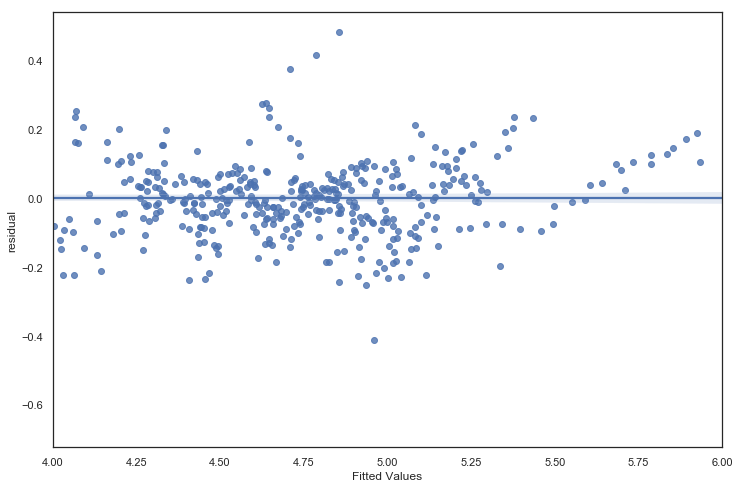

In [25]:
# visualization of heteroscedasticity
fitted = res.fitted_values
residuals = res.resids
plt.figure(figsize=(12,8))
sns.regplot(x=fitted,  y = residuals)
plt.xlabel('Fitted Values')
plt.xlim([4,6])
plt.show()

<center><h2>WEIGHTED REGRESSION</h2></center>